In [95]:
import numpy as np
from numpy import sum, sqrt, exp
import matplotlib.pyplot as plt

In [96]:
m = 0.067
omega = 5/27211.6 # w j. a
N = 200 # ilość oczek w osi 'x'
T = 2*np.pi/omega
dt = 1 # 2.42E-17 #s, 2.42E-05 ps
x_vec = np.linspace(-100, 100, N+1)/0.05292 #j.a
t_vec = np.linspace(0, 10*T, 10*int(T/dt))
Psi = np.zeros([len(t_vec), len(x_vec)], dtype = 'complex_')
Psi_sq = np.zeros([len(t_vec), len(x_vec)]) # moduł z Psi
dx = (len(x_vec)/N)/0.05292 # j.a
x0 = 30/0.05292 # j.a

In [97]:
def starting_cond_0(x: float) -> float:
    return exp(-0.5*m*omega*(x - x0)**2)

def starting_cond_dt(dt: float) -> complex:
    return exp(-0.5*1j*omega*dt)

def potential(x: float) -> float:
    return 0.5*m*(omega**2)*x**2

In [98]:
V = [potential(x) for x in x_vec]

# plt.plot(x_vec*0.05292, V)
# plt.xlabel('x [nm]')
# plt.ylabel('V [j. a]')
# plt.grid()
# plt.show()

### Punkt 3

In [99]:
for x in range(1, len(x_vec) - 1): # t = 0
    Psi[0][x] = starting_cond_0(x_vec[x])

C0 = dx*sum(Psi[0]**2) # liczenie stałej
Psi[0] = Psi[0]/sqrt(C0) # normowanie

for x in range(1, len(x_vec) - 1): # t = dt
    Psi[1][x] = Psi[0][x] * starting_cond_dt(dt)

for t in range(2, len(t_vec)): # t > dt
    for x in range(1, len(x_vec) - 1):
        Psi[t][x] = Psi[t-2][x] + (dt/(1j*m)) * \
        ((Psi[t-1][x+1] + Psi[t-1][x-1] - 2*Psi[t-1][x])/(dx**2) + \
        (-2*m) * potential(x_vec[x])*Psi[t-1][x])

Psi_sq = abs(Psi) # Liczenie modułu z Psi

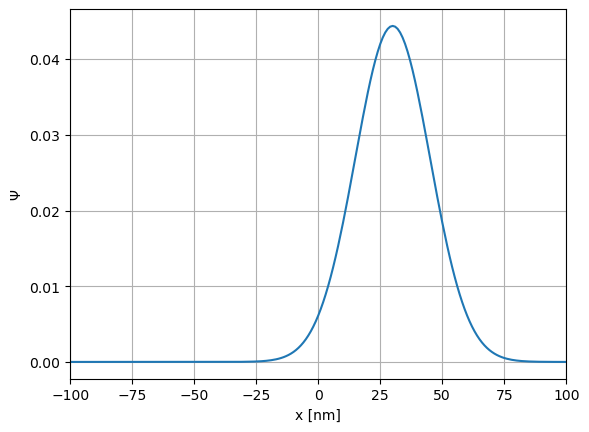

In [100]:
plt.plot(x_vec*0.05292, Psi[0])
plt.xlabel('x [nm]')
plt.ylabel(r'$\Psi$')
plt.xlim(x_vec[0]*0.05292, x_vec[-1]*0.05292)
plt.grid()
plt.show()

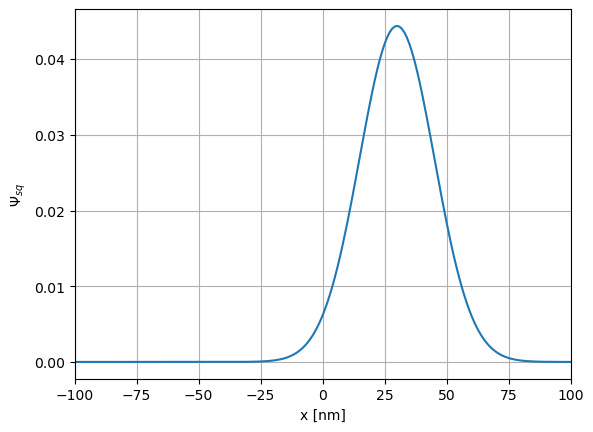

In [101]:
plt.plot(x_vec*0.05292, Psi_sq[0])
plt.xlabel('x [nm]')
plt.ylabel(r'$\Psi_{sq}$')
plt.xlim(x_vec[0]*0.05292, x_vec[-1]*0.05292)
plt.grid()
plt.show()

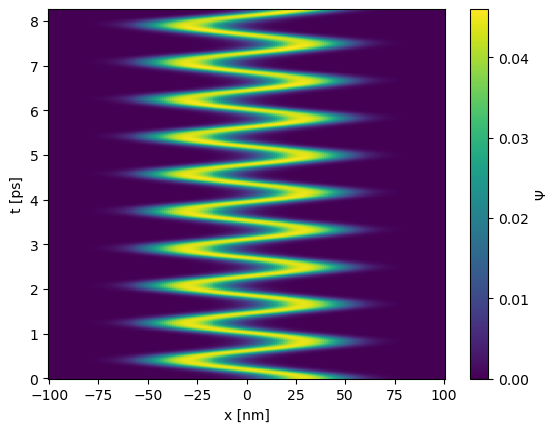

In [102]:
plt.pcolor(x_vec*0.05292, t_vec[0:-1:1000]*2.42E-05, Psi_sq[:-1:1000])
plt.xlabel('x [nm]')
plt.ylabel('t [ps]')
cbar = plt.colorbar()
cbar.set_label(r'$\Psi$')
plt.show()

### Punkt 4

In [117]:
x_cl = [x0*np.cos(omega*t) for t in t_vec] # klasyczne położenie cząstki
x_cl = np.array(x_cl) # zamiana na np.array
x_expected = np.zeros([len(t_vec), len(x_vec)])

In [118]:
for t in range(len(t_vec)): # t > dt
    for x in range(len(x_vec)):
        x_expected[t][x] = (Psi[t][x]**2)*x_vec[x]*dx

C:\Users\48728\AppData\Local\Temp\ipykernel_9312\447066284.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  x_expected[t][x] = (Psi[t][x]**2)*x_vec[x]*dx


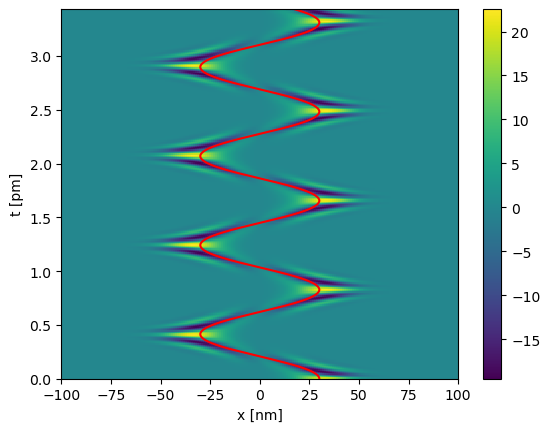

In [131]:
plt.plot(x_cl*0.05292, t_vec*2.42E-05, color='r')
plt.pcolor(x_vec*0.05292, t_vec[0:-1:500]*2.42E-05, x_expected[:-1:500])
plt.xlabel('x [nm]')
plt.ylabel('t [pm]')
plt.xlim(x_vec[0]*0.05292, x_vec[-1]*0.05292)
plt.ylim(t_vec[0]*2.42E-05, t_vec[-200000]*2.42E-05)
cbar = plt.colorbar()
plt.show()